CROP AND FERTILIZER RECOMMENDATION SYSTEM USING ML

In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#loading dataset

In [2]:
import pandas as pd

crop = pd.read_csv(r"dataset\Crop_recommendation.csv")


In [3]:
# Returns starting 5 rows 
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Returns last 5 rows
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
# shape - Returns rows and columns
crop.shape 

(2200, 8)

In [6]:
# Returns info of dataset 
crop.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
# Check for missing values
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [8]:
# Returns the sum of missing values
crop.isnull().sum() 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# Check for duplicated values 
crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [10]:
# Return sum of duplicated values 
crop.duplicated().sum()

np.int64(0)

In [11]:
# To check the statistics of the dataset 
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
# Shows all the columns 
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
# Check feature of specific columns
crop['label'].value_counts() 

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [14]:
# Remove leading/trailing spaces
crop.columns = crop.columns.str.strip()


In [15]:
crop[['N','temperature']].apply(pd.Series.value_counts)


,N,temperature
0.0,27.0,NaN
1.0,20.0,NaN
2.0,26.0,NaN
3.0,21.0,NaN
4.0,27.0,NaN
...,...,...
134.0,2.0,NaN
135.0,1.0,NaN
136.0,2.0,NaN
139.0,1.0,NaN


#Using .unique() to Get Unique Values

In [16]:
print(crop[ 'label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


#to Get Value Counts

In [17]:
print(crop['humidity'].value_counts())

humidity
60.396475    1
82.002744    1
80.319644    1
82.320763    1
80.158363    1
            ..
80.886848    1
81.450616    1
81.417538    1
83.033227    1
83.535216    1
Name: count, Length: 2200, dtype: int64


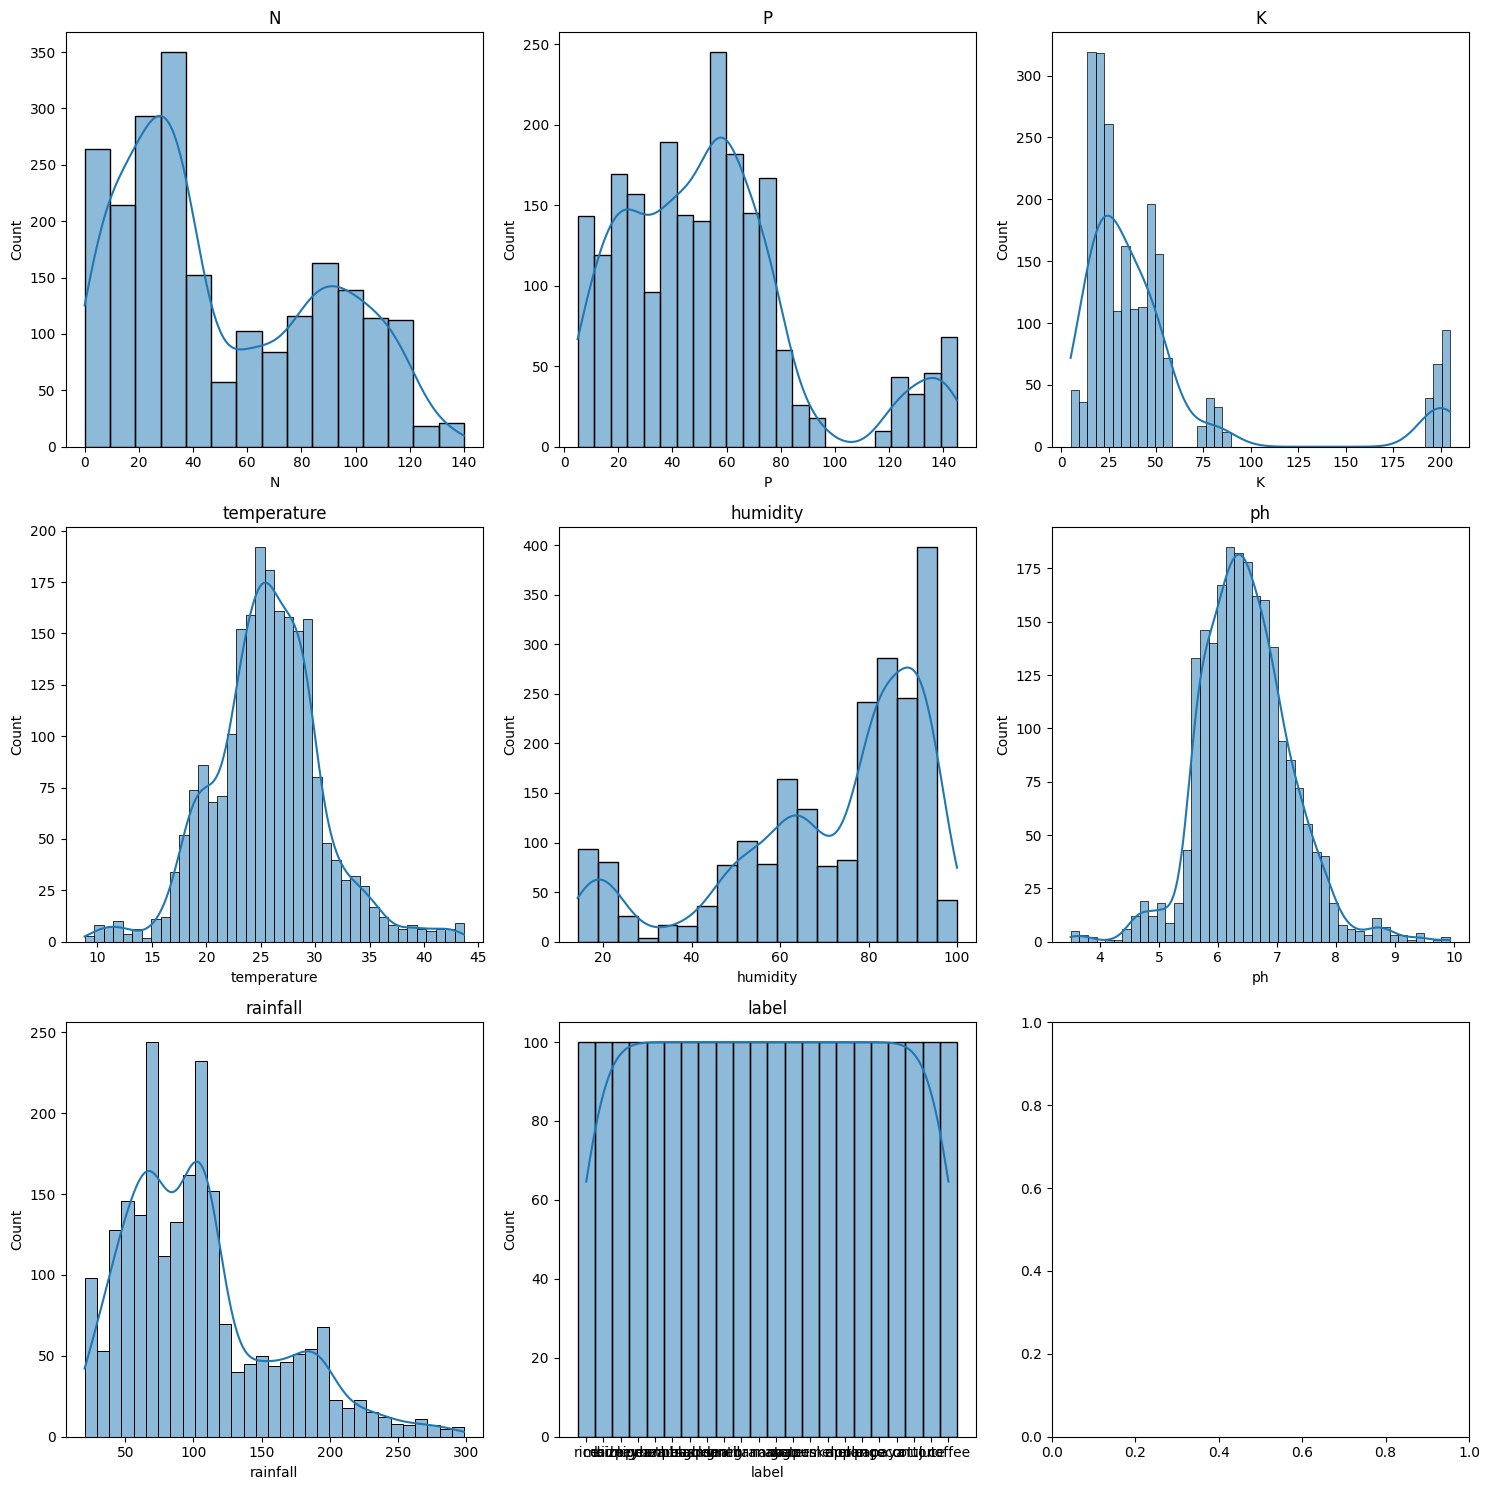

In [23]:
# Visualize the distribution of each feature

import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

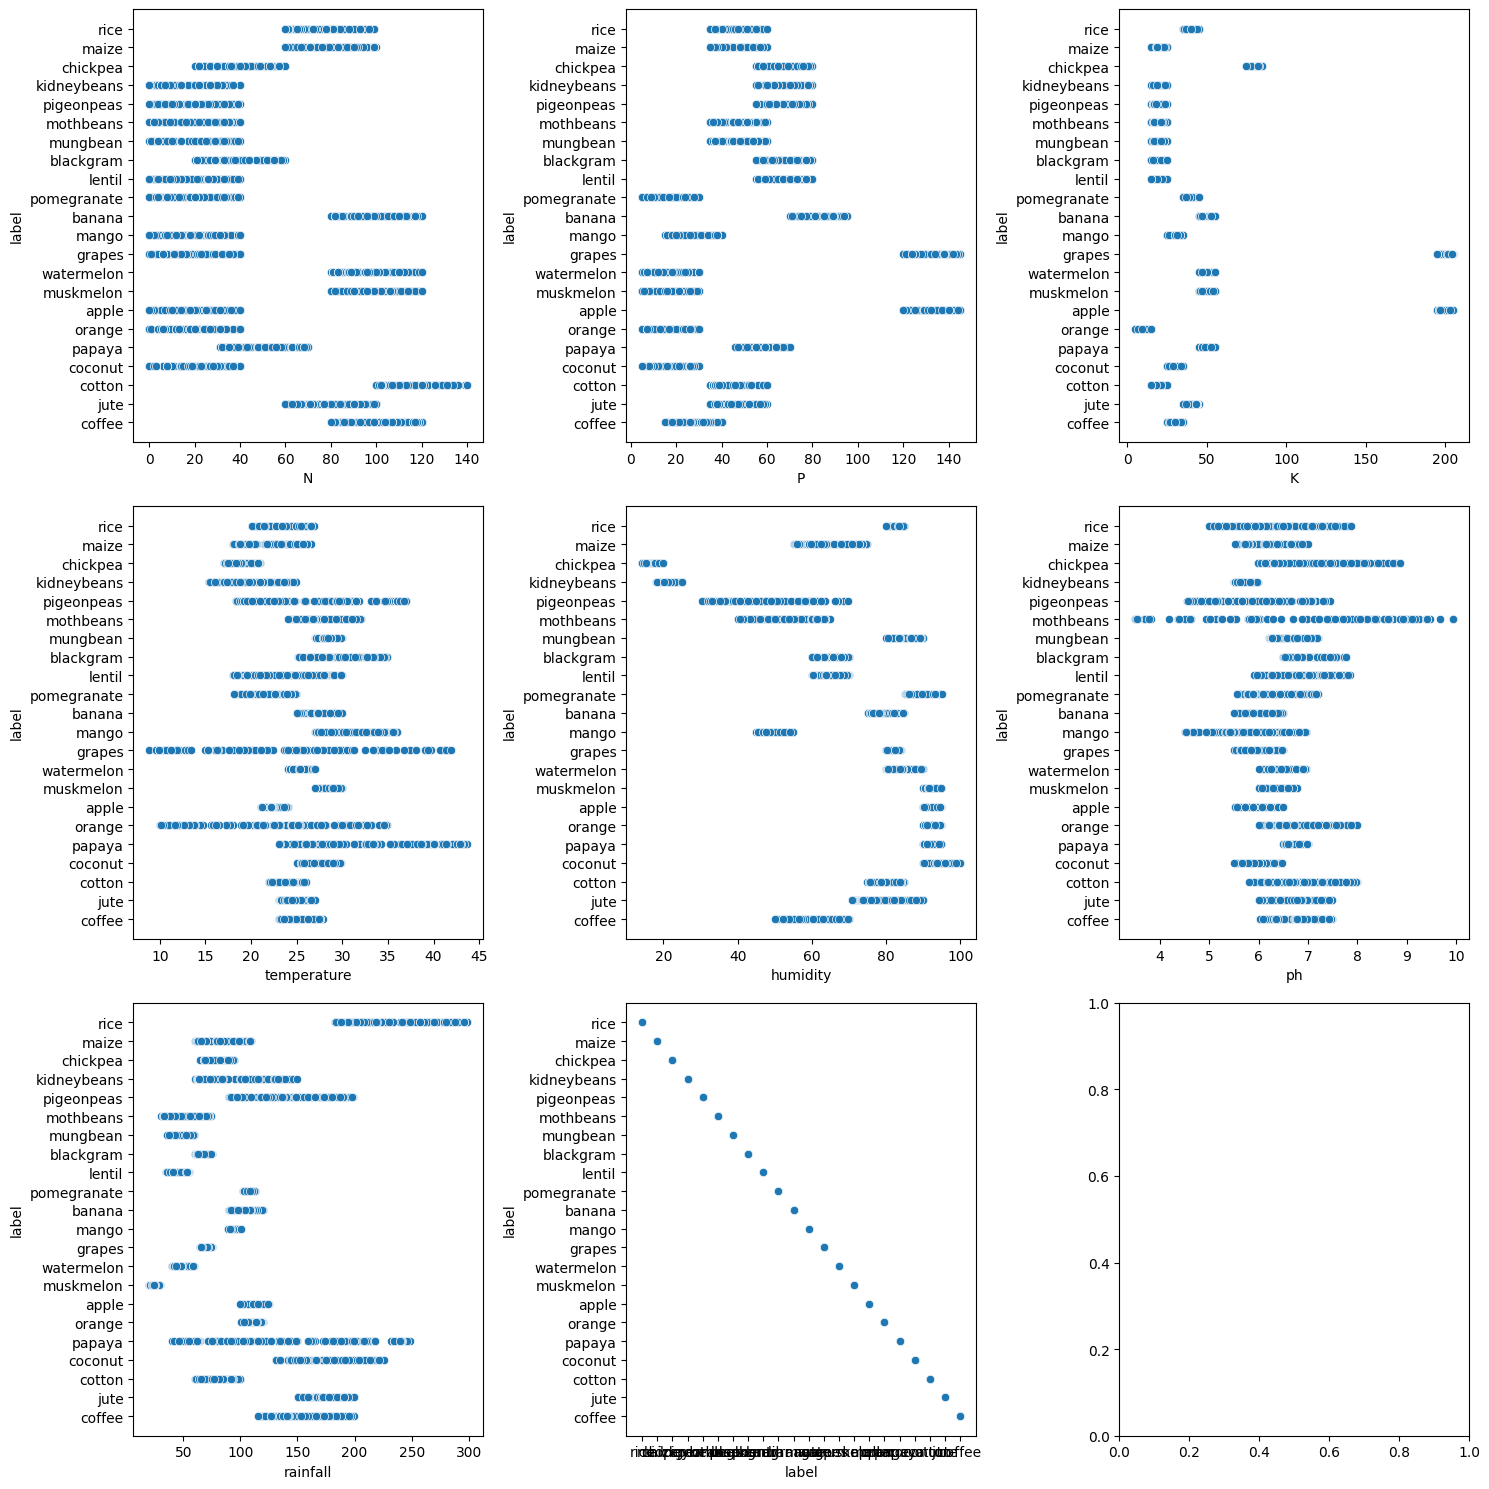

In [24]:
# Ploting scatter plot
import seaborn as sns
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

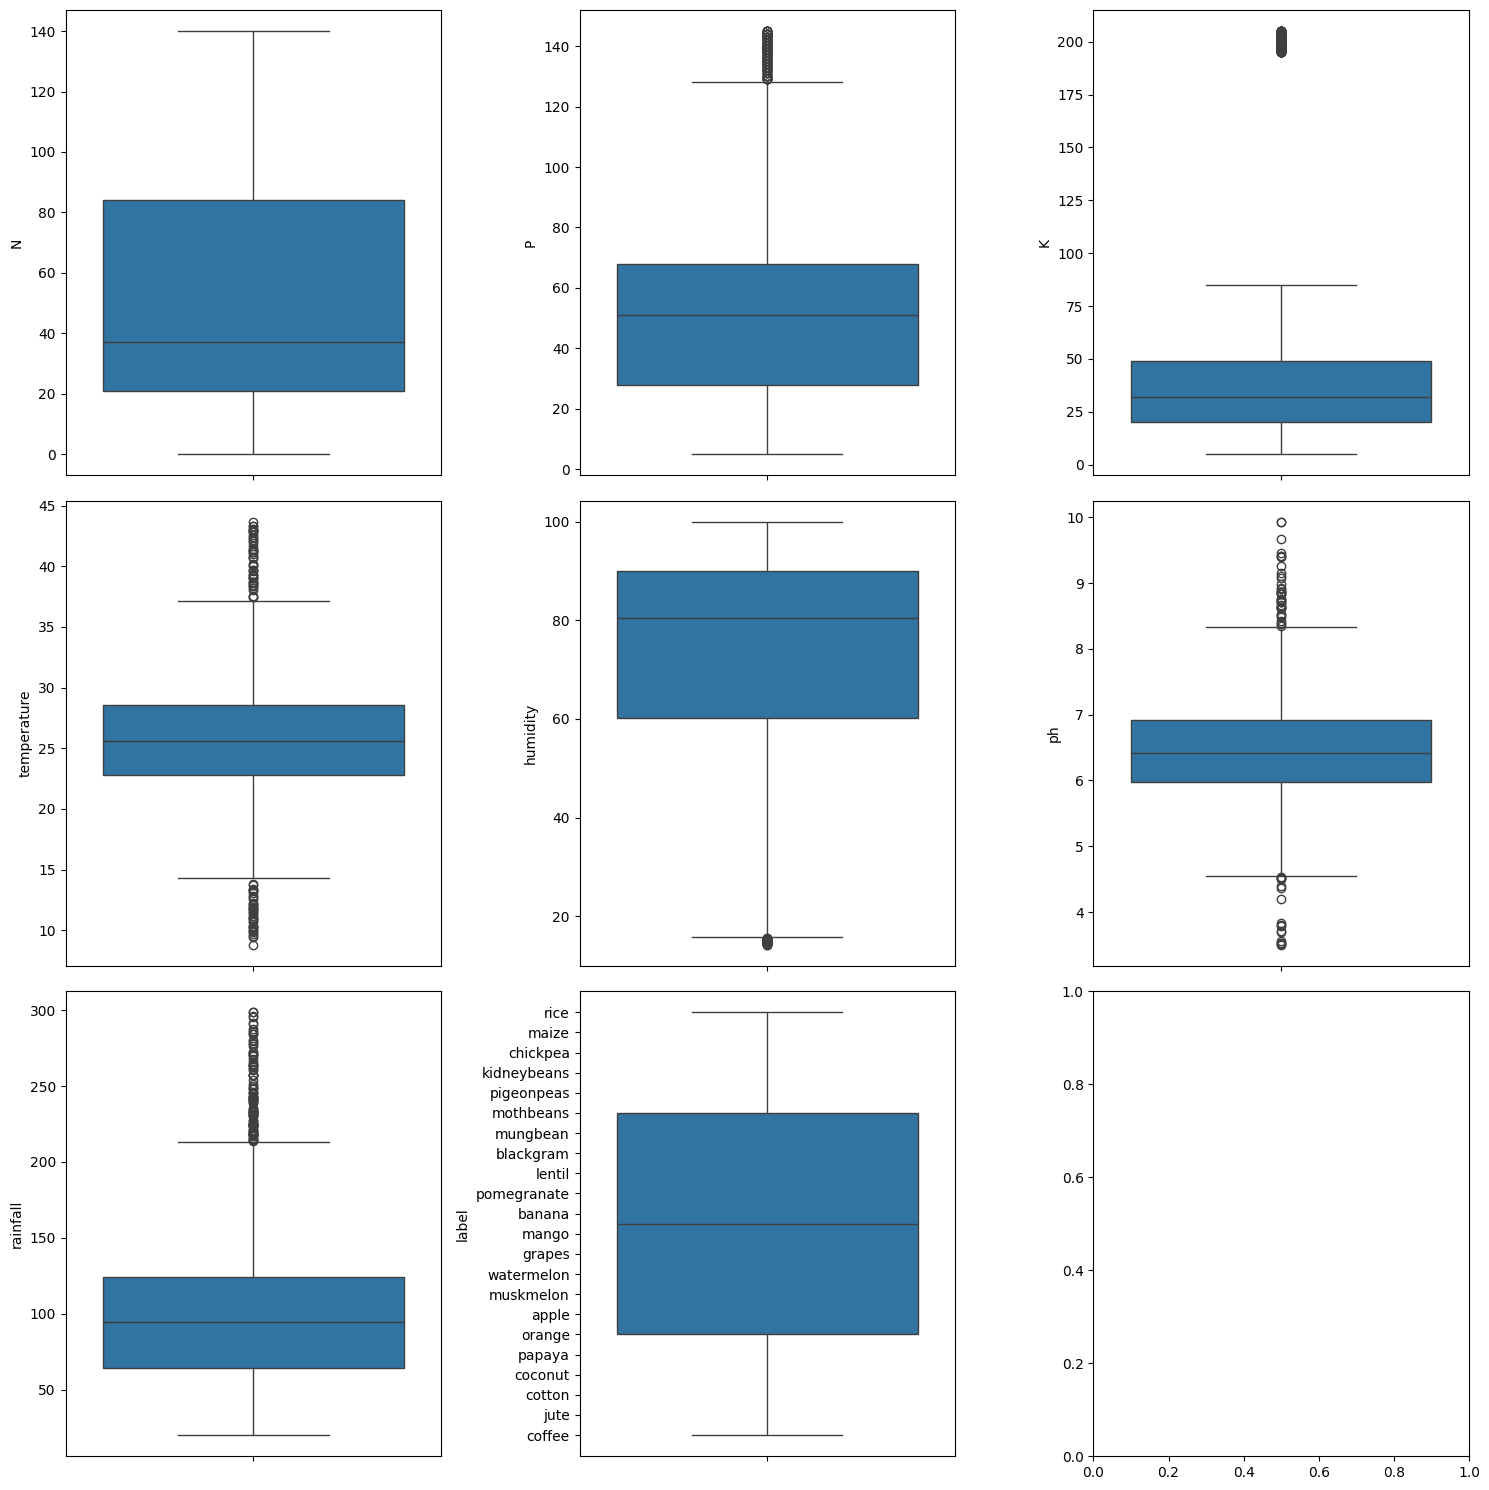

In [25]:
# Finding outliers - boxplot
fig, ax = plt.subplots(3,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

In [26]:
# Correlation of the features
num_cols = crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [27]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


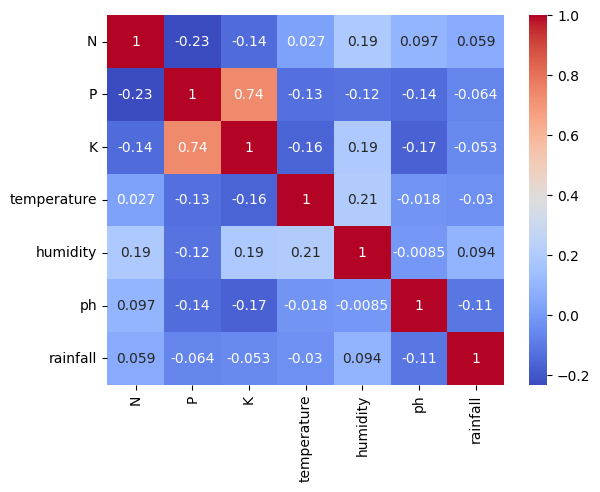

In [28]:
# Visualizing with Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [29]:
#encoding
crop['label'].nunique()


22

In [34]:
crop_dict = {
    'rice': 0,
    'maize': 1,
    'chickpea': 2,
    'kidneybeans': 3,
    'mungbean': 4,
    'blackgram': 5,
    'lentil': 6,
    'pomegranate': 7,
    'banana': 8,
    'mango': 9,
    'grapes': 10,
    'watermelon': 11,
    'muskmelon': 12,
    'apple': 13,
    'orange': 14,
    'papaya': 15,
    'coconut': 16,
    'cotton': 17,
    'jute': 18,
    'coffee': 19
}

In [35]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0


In [36]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,19.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,19.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,19.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,19.0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,19.0
